In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
digit = keras.datasets.mnist
(X_train,y_train),( X_test, y_test) = digit.load_data()

In [3]:
class_name = ['0','1','2','3','4','5','6','7','8','9']

In [4]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

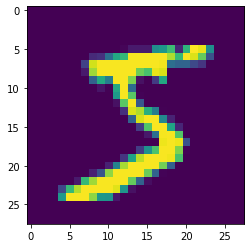

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [9]:
X_valid = X_train[:6000]
X_train = X_train[6000:]

In [10]:
y_valid = y_train[:6000]
y_train = y_train[6000:]

In [11]:
np.random.seed(45)
tf.random.set_seed(45)

In [12]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [15]:
model_history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4820 - accuracy: 0.8648 - val_loss: 0.1197 - val_accuracy: 0.9645
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1117 - accuracy: 0.9656 - val_loss: 0.1025 - val_accuracy: 0.9693
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0710 - accuracy: 0.9770 - val_loss: 0.1000 - val_accuracy: 0.9710
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.1000 - val_accuracy: 0.9708
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.1012 - val_accuracy: 0.9725


In [16]:
model_history.params

{'verbose': 1, 'epochs': 5, 'steps': 1688}

In [17]:
model_history.history

{'loss': [0.2692332863807678,
  0.10851843655109406,
  0.0733293741941452,
  0.05402809754014015,
  0.03996030613780022],
 'accuracy': [0.9220370650291443,
  0.9658703804016113,
  0.9770370125770569,
  0.9823889136314392,
  0.9864073991775513],
 'val_loss': [0.11969326436519623,
  0.10250679403543472,
  0.10000777244567871,
  0.09997481107711792,
  0.10115674883127213],
 'val_accuracy': [0.9645000100135803,
  0.9693333506584167,
  0.9710000157356262,
  0.9708333611488342,
  0.9725000262260437]}

[]

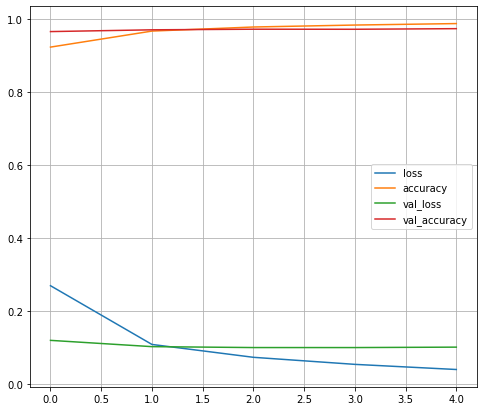

In [18]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,7))
plt.grid()
plt.plot()

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 863us/step - loss: 0.0943 - accuracy: 0.9732


[0.094278484582901, 0.9732000231742859]

In [20]:
X_new=X_test[:5]

In [21]:
Y_prob=model.predict(X_new)

In [22]:
Y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(54,36;334.8x217.44)


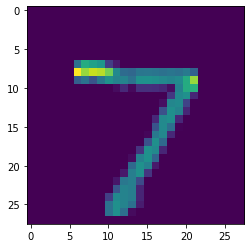

In [23]:
print(plt.imshow(X_new[0]))

AxesImage(54,36;334.8x217.44)


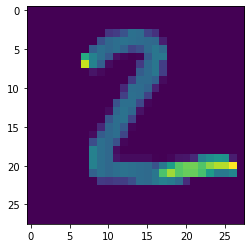

In [24]:
print(plt.imshow(X_new[1]))

AxesImage(54,36;334.8x217.44)


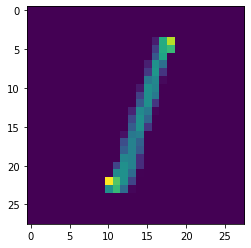

In [25]:
print(plt.imshow(X_new[2]))

AxesImage(54,36;334.8x217.44)


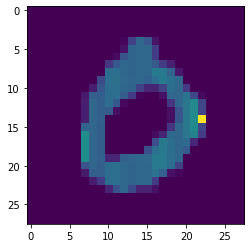

In [26]:
print(plt.imshow(X_new[3]))

AxesImage(54,36;334.8x217.44)


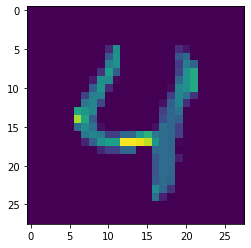

In [27]:
print(plt.imshow(X_new[4]))

In [28]:
Y_pred=model.predict_classes(X_new)
Y_pred

/home/adarshsrivastava/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4])